In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Monthly Rainfall Index and Flood Probability Kerala.csv")

df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [4]:
df['FLOODS'] = df['FLOODS'].replace('YES', 1)
df['FLOODS'] = df['FLOODS'].replace('NO', 0)
df.drop(['SUBDIVISION', ' ANNUAL RAINFALL'], axis=1, inplace=True)

In [5]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0


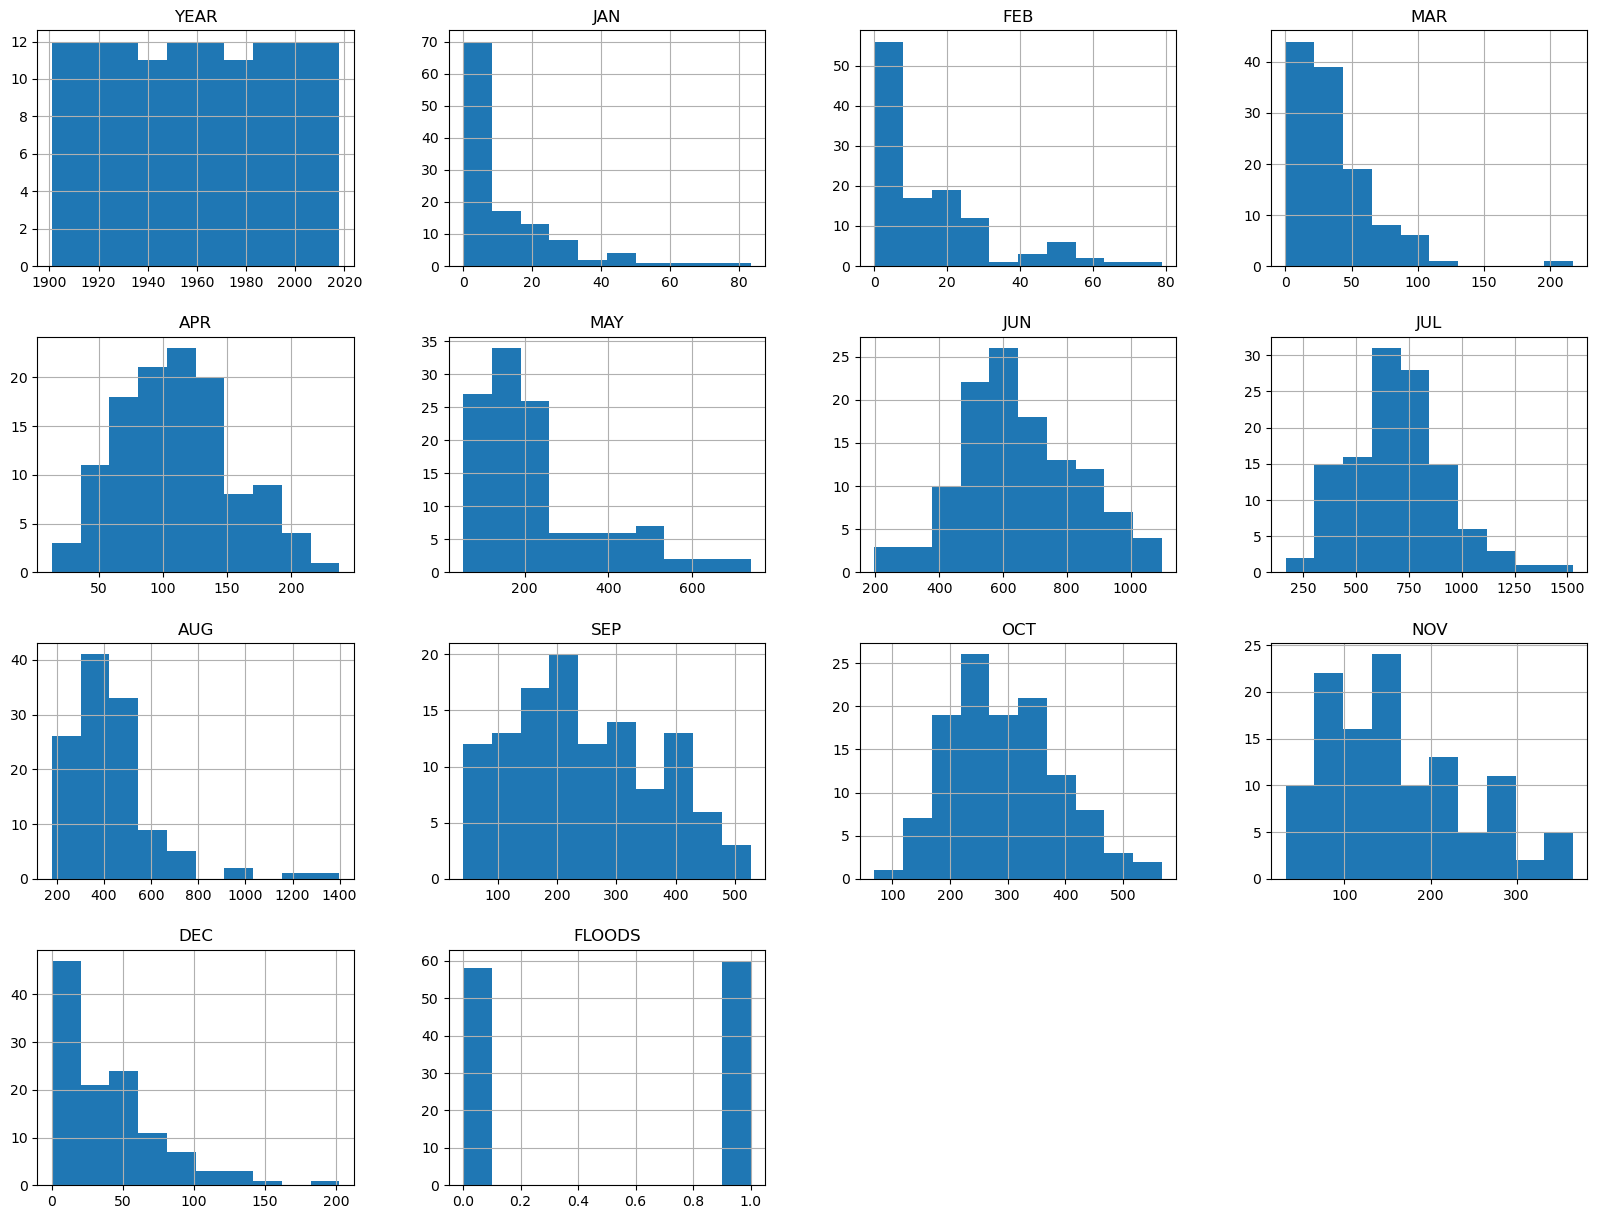

In [6]:
df.hist(bins=10, figsize=(20,15))
plt.show()

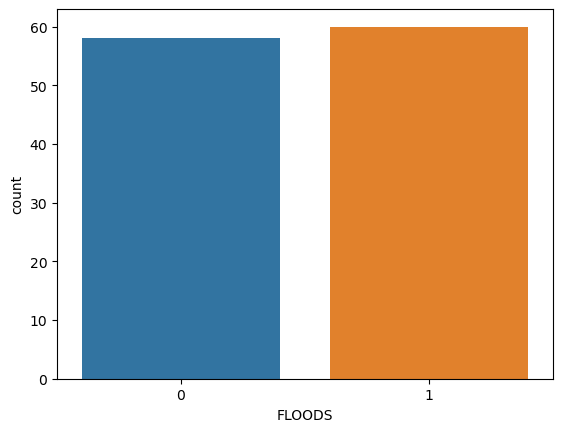

In [7]:
sns.countplot(data=df,x='FLOODS')
plt.show()

In [8]:
corr_matrix = df.corr()
corr_matrix['FLOODS'].sort_values(ascending=False)

FLOODS    1.000000
JUL       0.442774
JUN       0.442531
SEP       0.376385
AUG       0.286690
MAY       0.242813
NOV       0.238852
JAN       0.145313
MAR       0.086739
OCT       0.060088
DEC       0.054326
APR       0.034392
FEB      -0.035730
YEAR     -0.202548
Name: FLOODS, dtype: float64

<AxesSubplot:>

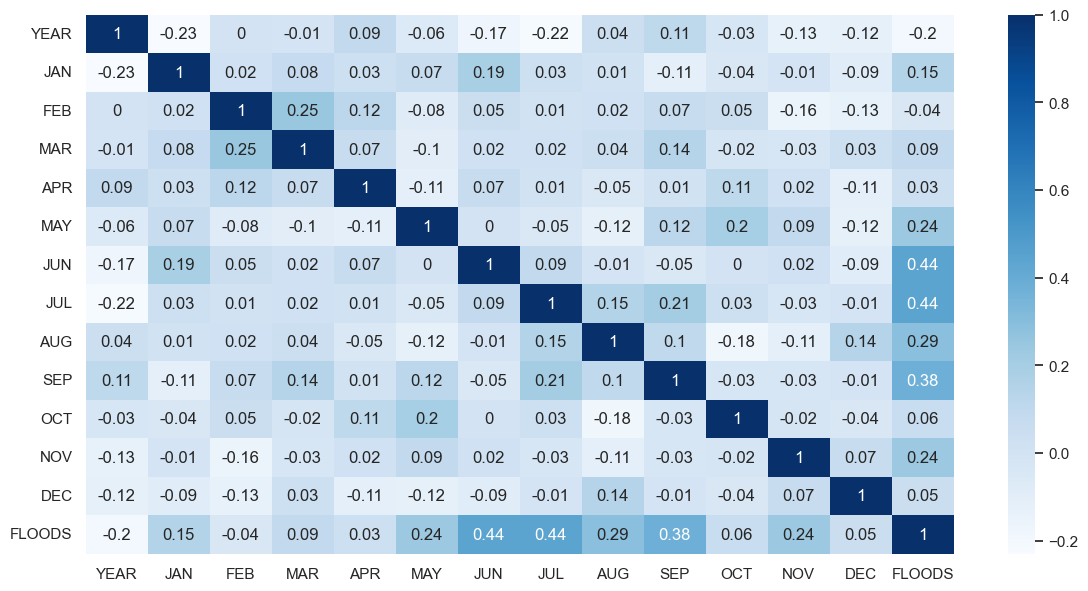

In [90]:
corr_matrix = df.corr().round(2)
sns.set(font_scale=1)
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot = True, cmap='Blues')

In [10]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [11]:
import tensorflow as tf
from tensorflow import keras

from keras.optimizers import Adam
from keras import layers
from keras.models import Sequential

In [12]:
def model_builder(hp):
    model = Sequential()

    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=14, step=1)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=101, step=1)
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

    model.add(layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    return model

In [13]:
import keras_tuner as kt

In [60]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='dir',
    overwrite=True
)

In [61]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [62]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[stop_early])

Trial 90 Complete [00h 00m 01s]
val_accuracy: 0.6000000238418579

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 05s
INFO:tensorflow:Oracle triggered exit


In [63]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [65]:
model =  tuner.hypermodel.build(best_hyperparameters)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[stop_early])

Epoch 1/50
3/3 [==============================] - 1s 145ms/step - loss: 0.6324 - accuracy: 0.6190 - val_loss: 0.5504 - val_accuracy: 0.8000
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.4429 - accuracy: 0.8452 - val_loss: 0.4431 - val_accuracy: 0.8000
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.3415 - accuracy: 0.8810 - val_loss: 0.3335 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 0s 24ms/step - loss: 0.2497 - accuracy: 0.9167 - val_loss: 0.2421 - val_accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.1869 - accuracy: 0.9405 - val_loss: 0.2170 - val_accuracy: 0.8000
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1336 - accuracy: 0.9524 - val_loss: 0.2212 - val_accuracy: 0.8000
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0916 - accuracy: 0.9762 - val_loss: 0.1982 - val_accuracy: 0.9000
Epoch 8/50
3/3 [==========

In [66]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.632421,0.619048,0.550447,0.8
1,0.442919,0.845238,0.443111,0.8
2,0.341528,0.880952,0.333543,0.8
3,0.249733,0.916667,0.242137,0.9
4,0.186931,0.940476,0.217049,0.8
5,0.133598,0.952381,0.221183,0.8
6,0.091616,0.976190,0.198169,0.9
7,0.066136,0.988095,0.150741,1.0
8,0.045299,0.988095,0.132158,0.9
9,0.031858,1.000000,0.141329,0.9


In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                169       
                                                                 
 dense_7 (Dense)             (None, 82)                1148      
                                                                 
 dense_8 (Dense)             (None, 1)                 83        
                                                                 
Total params: 1,400
Trainable params: 1,400
Non-trainable params: 0
_________________________________________________________________


In [68]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 65ms/step


In [69]:
y_pred = (y_pred>0.5)

y_pred = y_pred.reshape(-1)

y_pred = y_pred.astype(int)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

<AxesSubplot:>

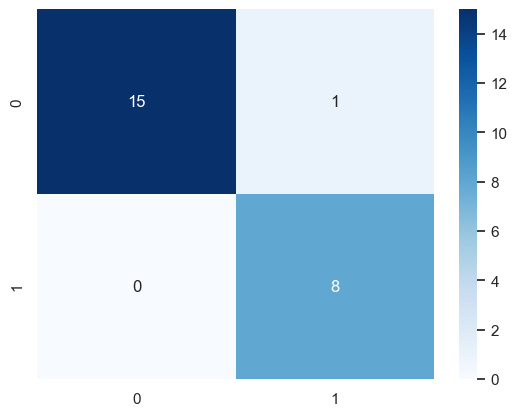

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.89      1.00      0.94         8

    accuracy                           0.96        24
   macro avg       0.94      0.97      0.95        24
weighted avg       0.96      0.96      0.96        24



In [73]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.9583333333333334
F1 Score:  0.9411764705882353


In [74]:
model.save('flood_prediction_model.h5')

---

## Time Series Model

In [75]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sklearn
assert sklearn.__version__ >= "0.20"

from time import time
import os

from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from sklearn import model_selection

import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace import sarimax as SARIMAX
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [76]:
df1 = pd.read_csv("Monthly Rainfall Index Kerala Time Series.csv", index_col="Date", parse_dates=True)

df1.head()

,Rainfall(mm)
Date,
1901-01-01,28.7
1901-02-01,44.7
1901-03-01,51.6
1901-04-01,160.0
1901-05-01,174.7


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1416 entries, 1901-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rainfall(mm)  1416 non-null   float64
dtypes: float64(1)
memory usage: 22.1 KB


In [78]:
df1.describe()

,Rainfall(mm)
count,1416.000000
mean,243.786794
std,258.398667
min,0.000000
25%,35.275000
50%,154.700000
75%,371.350000
max,1526.500000


In [79]:
train = df1.iloc[:-36, :]
test = df1.iloc[-36:, :]

### Time Series Analysis

<AxesSubplot:xlabel='Date'>

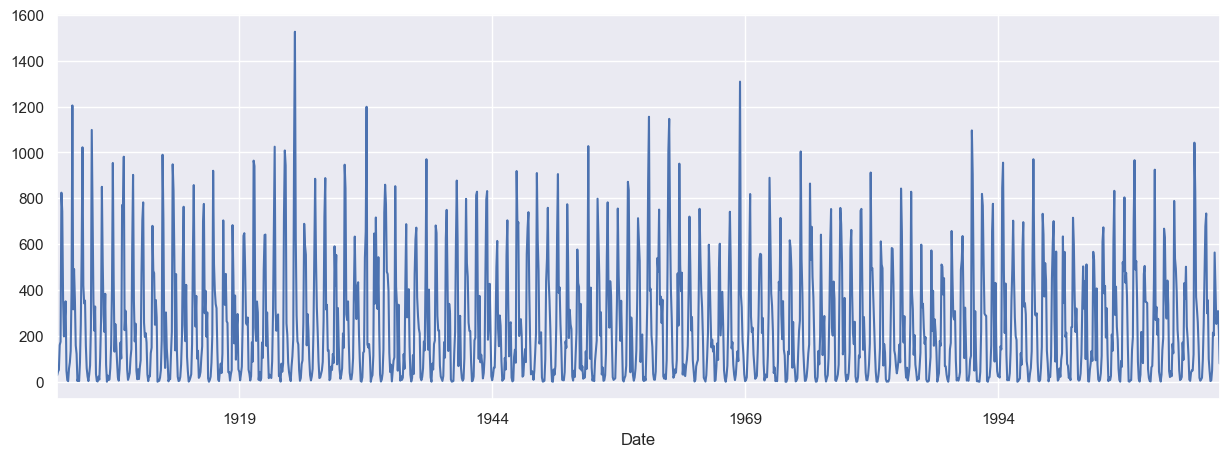

In [80]:
plt.figure(figsize=(15,5))
train['Rainfall(mm)'].plot()

### Stationarity Test

In [81]:
# Function to test the stationarity
def stationarity_test(ts):
    
    # Determining rolling statistics
    rolling_mean = ts.rolling(window=12).mean()
    rolling_std = ts.rolling(window=12).std()

    # Plotting rolling statistics:
    original = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
    # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    adfuller_test = adfuller(ts, autolag='AIC')
    print('ADF Statistic: %f' % adfuller_test[0])
    print('p-value: %f' % adfuller_test[1])
    print('Critical Values:')
    for key, value in adfuller_test[4].items():
           print(key, value)

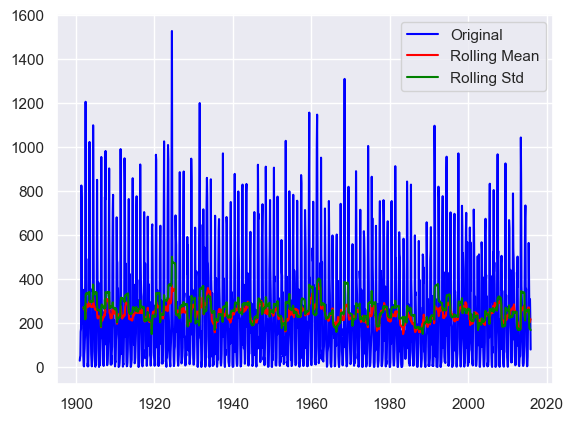

Results of Dickey-Fuller Test:
ADF Statistic: -5.631022
p-value: 0.000001
Critical Values:
1% -3.4351852261663867
5% -2.863675384893896
10% -2.5679068804891


In [82]:
stationarity_test(train['Rainfall(mm)'])

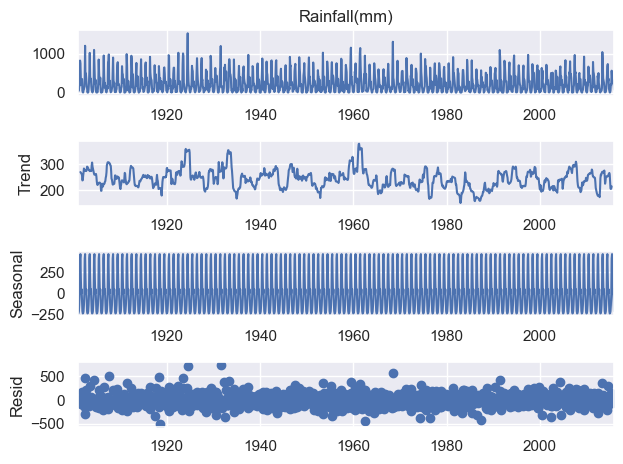

In [83]:
seasonal_decomposition = seasonal_decompose(train['Rainfall(mm)'], period = 12).plot()
plt.show()

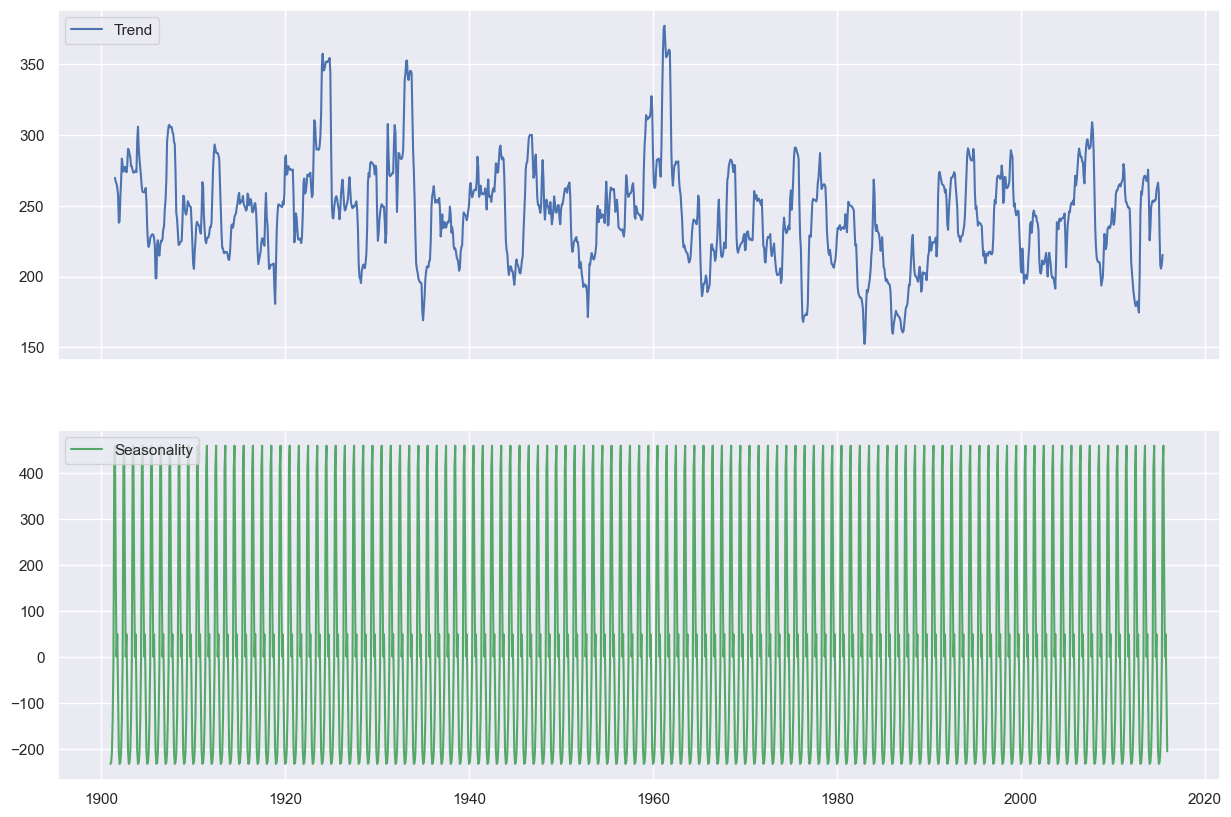

In [84]:
seasonal_decomposition = seasonal_decompose(train, period = 12)

train_trend = seasonal_decomposition.trend
train_seasonal = seasonal_decomposition.seasonal

fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[1].plot(train_seasonal, 'g', label='Seasonality')
axes[1].legend(loc='upper left')

axes[0].plot(train_trend, label='Trend')
axes[0].legend(loc='upper left')


In [85]:
# train_residual = seasonal_decomposition.resid
# train_residual = train_residual.dropna()
# stationarity_test(train_residual)

Text(0.5, 1.0, 'PACF')

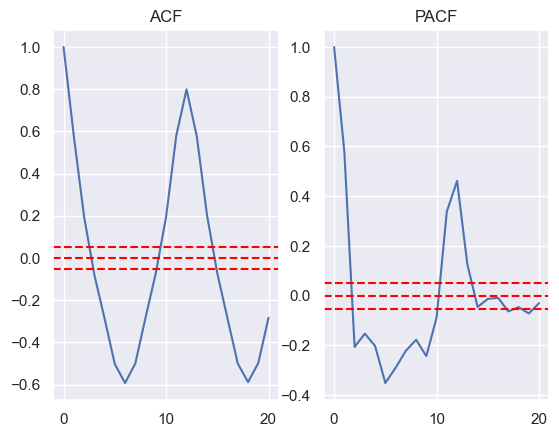

In [86]:
lag_acf = acf(train,nlags=20)
lag_pacf = pacf(train,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color ='red')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color ='red')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color ='red')
plt.title('ACF')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color ='red')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color ='red')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color ='red')
plt.title('PACF')

<AxesSubplot:xlabel='Date'>

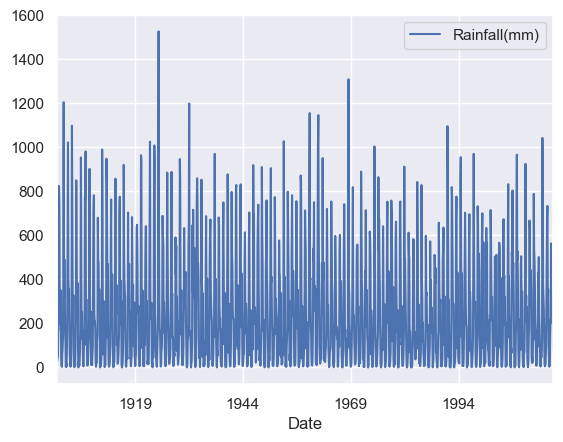

In [87]:
train_sarima = train.resample("MS").mean() 
train_sarima = train_sarima[["Rainfall(mm)"]]
train_sarima.plot()

In [88]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [89]:
min_aic = 10**10
min_pdq = None
min_s_pdq = None

for val in pdq:
    for val_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_sarima,
                                            order=val,
                                            seasonal_order=val_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            if (results.aic <= min_aic):
                min_aic = results.aic
                min_pdq = val
                min_s_pdq = val_seasonal
                # print('SARIMA:{}x{} - AIC:{}'.format(val, val_seasonal, results.aic))

        except:
            continue

In [91]:
#  SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:16817.862622135865
print('SARIMA:{}x{} - AIC:{}'.format(min_pdq, min_s_pdq, min_aic))

SARIMA:(0, 1, 1)x(1, 1, 1, 12) - AIC:16817.862622135865


In [92]:
sarima_model = sm.tsa.statespace.SARIMAX(
    train_sarima,
    order=(0, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_sarima = sarima_model.fit()

print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9958      0.005   -211.890      0.000      -1.005      -0.987
ar.S.L12       0.0479      0.019      2.553      0.011       0.011       0.085
ma.S.L12      -1.0197      0.009   -119.618      0.000      -1.036      -1.003
sigma2      1.362e+04    325.844     41.796      0.000     1.3e+04    1.43e+04


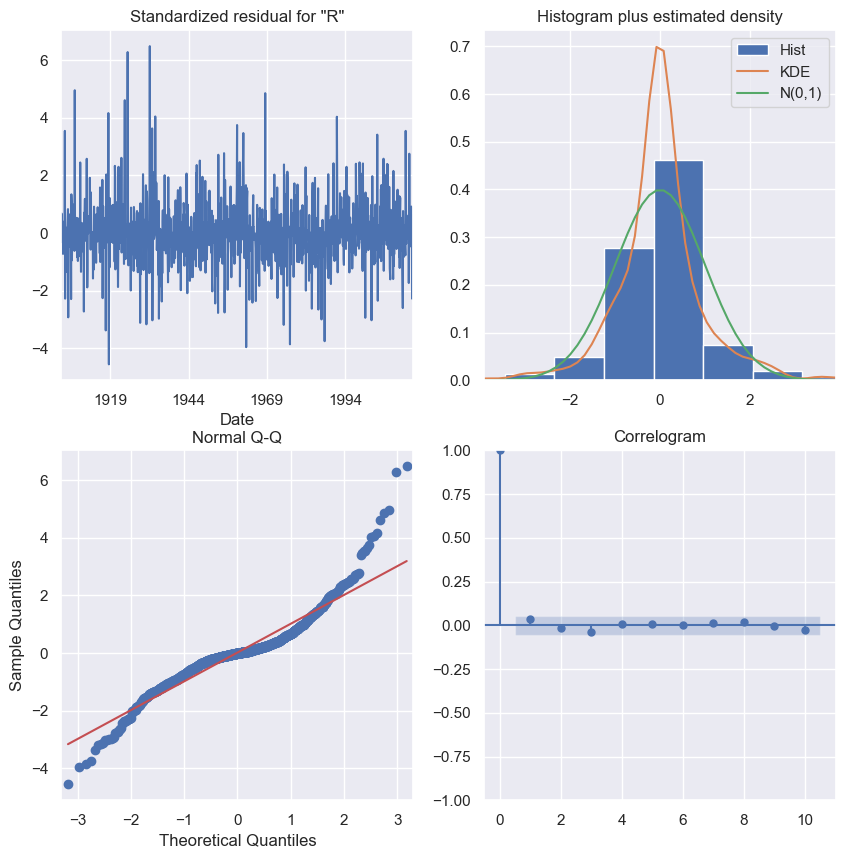

In [93]:
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()

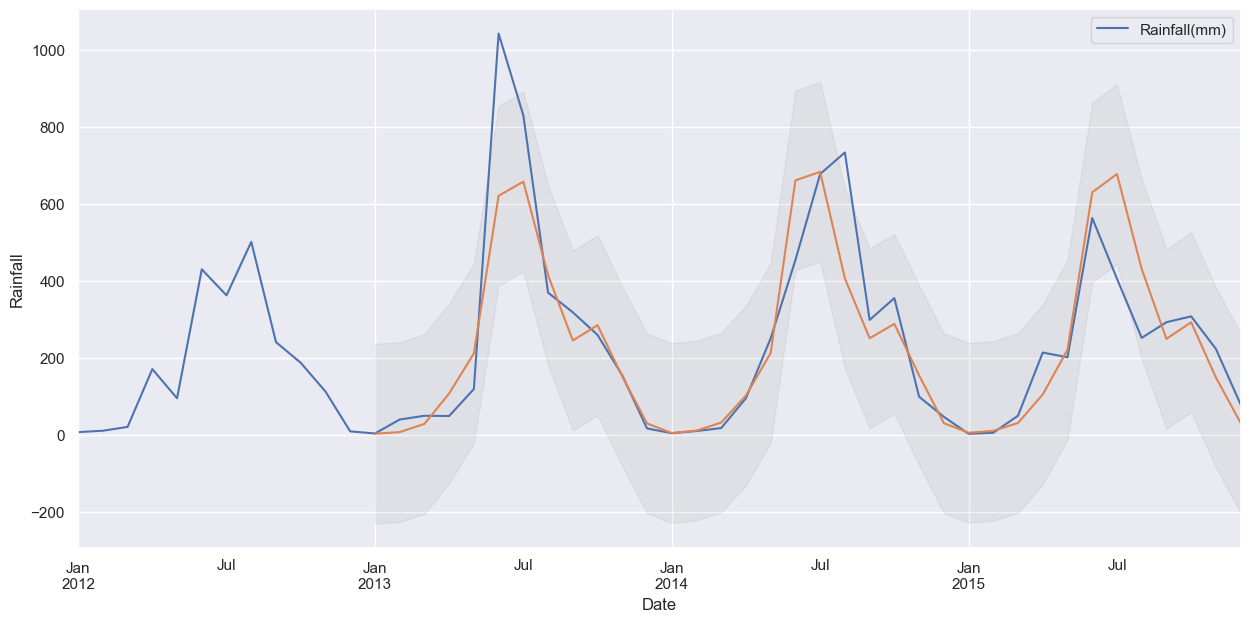

Root Mean Squared Error:  120.59713541491737


In [94]:
# Model Prediction and validation 
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.

pred = results_sarima.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic = False) 

# Get confidence intervals of forecasts
pred_ci = pred.conf_int() 

ax = train_sarima["2012":].plot(label="observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label="One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Rainfall")

plt.legend
plt.show()

train_sarima_forecasted = pred.predicted_mean
train_sarima_truth = train_sarima["2013-01-01":]

# Calculating the error
rmse_sarima = sqrt(mean_squared_error(train_sarima_truth, train_sarima_forecasted))
print("Root Mean Squared Error: ", rmse_sarima)

In [95]:
predictions = pd.Series(results_sarima.predict(start=len(train), end=len(train)+len(test)-1))
predictions.index = test.index

predictions.head()

Date
2016-01-01      4.527623
2016-02-01      9.289705
2016-03-01     32.006541
2016-04-01    111.973176
2016-05-01    216.984852
Name: predicted_mean, dtype: float64

Root Mean Squared Error:  199.16301655499558


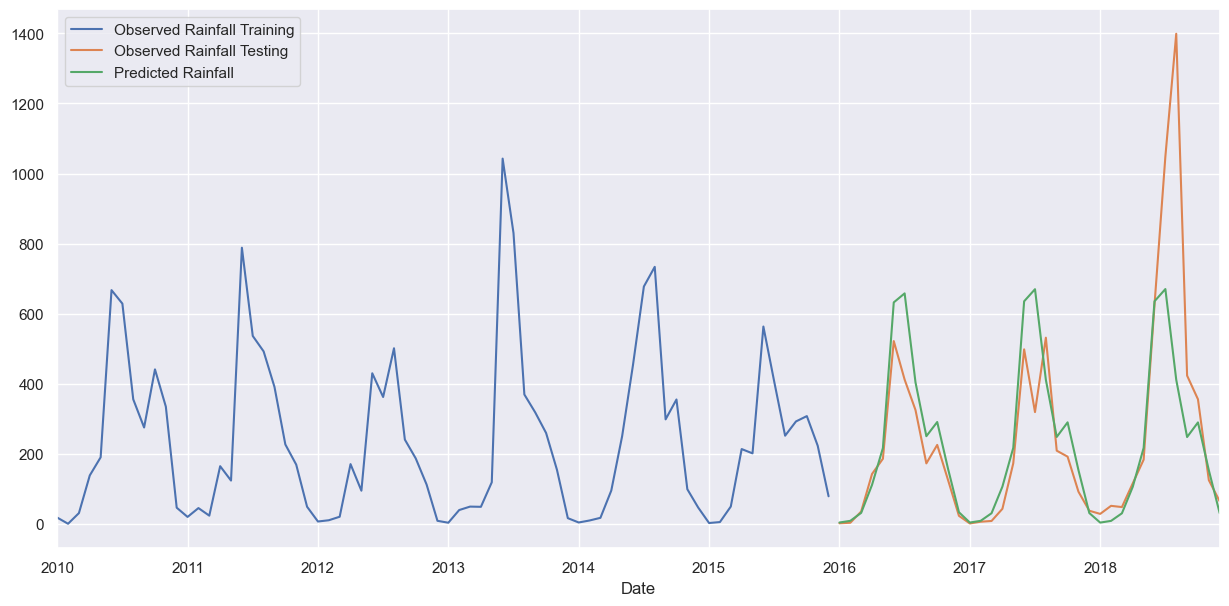

In [96]:
train['Rainfall(mm)']['2010-01-01':].plot(figsize=(15,7), legend=True, label="Observed Rainfall Training")
test['Rainfall(mm)'].plot(legend=True, label="Observed Rainfall Testing")
predictions.plot(legend=True, label="Predicted Rainfall")


test_sarima_forecasted = predictions
test_sarima_truth = test

# Calculating the error
rmse_sarima = sqrt(mean_squared_error(test_sarima_truth, test_sarima_forecasted))
print("Root Mean Squared Error: ", rmse_sarima)

In [97]:
results_sarima.predict(start=len(train)+len(test)+48, end=len(train)+len(test)+60-1)

2023-01-01      3.543027
2023-02-01      8.408823
2023-03-01     30.040114
2023-04-01    105.780216
2023-05-01    216.692187
2023-06-01    634.894642
2023-07-01    669.834795
2023-08-01    411.095635
2023-09-01    247.606482
2023-10-01    289.333027
2023-11-01    152.860207
2023-12-01     30.509183
Freq: MS, Name: predicted_mean, dtype: float64

### Future Flood Prediction for 2023

In [98]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.preprocessing import StandardScaler

In [99]:
flood_prediction_model = keras.models.load_model('flood_prediction_model.h5')

In [100]:
df = pd.read_csv("Monthly Rainfall Index and Flood Probability Kerala.csv")

df['FLOODS'] = df['FLOODS'].replace('YES', 1)
df['FLOODS'] = df['FLOODS'].replace('NO', 0)
df.drop(['SUBDIVISION', ' ANNUAL RAINFALL'], axis=1, inplace=True)

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [101]:
df_rainfall_2023 = pd.DataFrame(
    np.array([[3.543027, 8.408823, 30.040114, 105.780216, 216.692187, 634.894642, 
    669.834795, 411.095635, 247.606482, 289.333027, 152.860207, 30.509183]]), 
    columns=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
)

df_rainfall_2023

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,3.543027,8.408823,30.040114,105.780216,216.692187,634.894642,669.834795,411.095635,247.606482,289.333027,152.860207,30.509183


In [102]:
print(flood_prediction_model.predict(std_scaler.transform(df_rainfall_2023)))

1/1 [==============================] - 0s 69ms/step
[[0.03735982]]


In [103]:
pred = flood_prediction_model.predict(std_scaler.transform(df_rainfall_2023))

if (pred > 0.5):
    print("A flood is predicted for 2023")
else:
    print("No flood is not predicted for 2023")

1/1 [==============================] - 0s 28ms/step
No flood is not predicted for 2023
